# **<font color=blue>K-means & DBSCAN</font>**
### 執行K-means(2個) & DBSCAN(3個)的範例，並改變其參數以影響結果
### 本次作業都把random_state設為0，確保都分割一樣的訓練及和測試集，方便調整參數看出不同

<br>
<br>

## **<font color=brown>K-means - 1</font>**
### 修改
- 增加array裡面資料的數量
- random_state設為0
- 把n_clusters從3更改為4
- 因為n_clusters=4，所以更改預測data為4組不同的


In [130]:
from sklearn.cluster import KMeans
import numpy as np

x= np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0],[19,7],[19,3],[19,5],[30,15],[30,29],[30,22]])
kmeans = KMeans(n_clusters=4, random_state=0).fit(x)
print(kmeans.labels_)
print()
print(kmeans.predict([[0,0],[9,3],[19,10],[100,50]]))
print()
print(kmeans.cluster_centers_)

[3 3 3 0 0 0 2 2 2 1 1 1]

[3 0 2 1]

[[10.  2.]
 [30. 22.]
 [19.  5.]
 [ 1.  2.]]


<br>
<br>

## **<font color=brown>K-means - 2</font>**
### 修改
- 把n_clusters從3更改為4
- algorithm = "elkan"
    - 使用三角不等式來計算距離，這樣效率比較高
- 把random_state設為0

### 可以看出當n_clusters從3更改為4，分群結果裡原本只有012變成了有0123

In [131]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

data = load_iris()
x = data['data']
y = data['target']

kmeans = KMeans(n_clusters=4, random_state=0, algorithm = "elkan").fit(x)

for i in range(3):
    print('cluster'+str(i)+':', kmeans.labels_[y == i],end = '\n\n')

cluster0: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]

cluster1: [3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3 3 3 3 3 3 0 0 0 0 3 0 3 3
 3 0 0 0 3 0 0 0 0 0 3 0 0]

cluster2: [2 3 2 2 2 2 0 2 2 2 3 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2
 2 3 2 2 2 3 2 2 2 3 3 2 3]



<br>
<br>

## **<font color=brown>DBSCN - 1</font>**
### 修改
- 增加array中資料的數量
- eps=5
    - 兩個樣本點可以視為鄰居的最大距離為5
- min_samples=1
    - 這裡是表示就算他只有自己一個點也算一個群

### min_samples=1時可以看出，自己算一個群就不會被歸在離群點

In [67]:
from sklearn.cluster import DBSCAN
import numpy as np

x= np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80],[25,83],[25,79],[25,81],[200,200]])
clustering = DBSCAN(eps=5, min_samples=1).fit(x)
print(clustering.labels_)

[0 0 0 1 1 2 2 2 2 3]


<br>
<br>

## **<font color=brown>DBSCN - 2</font>**
### 修改
- eps=0.3
    - 兩個樣本點可以視為鄰居的最大距離為0.3，相較ppt中漸少一點距離
- min_samples=3
    - 需要3個鄰居來成為核心點，相較ppt中漸少一個
    
### 可以看出當需要判斷的距離變小，需要判斷的鄰居變少，分群結果將會分出更多不同類群

In [94]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

data = load_iris()
x = data['data']
y = data['target']

dbscan = DBSCAN(eps=0.3, min_samples=3).fit(x)

for i in range(3):
    print('cluster'+str(i)+':',dbscan.labels_[y==i],end = '\n\n')

cluster0: [ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0 -1  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0]

cluster1: [ 1 -1  1  4  2 -1 -1 -1  2 -1 -1 -1 -1  3 -1  2 -1  4 -1  4  5 -1 -1  3
  2  2 -1 -1  3 -1  4  4  4 -1 -1 -1  1 -1  4  4  4  3  4 -1  4  4  4  2
 -1  4]

cluster2: [-1  6 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1  7 -1 -1 -1  8 -1 -1  5
  8 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1  7  5 -1  8 -1  6  8  8 -1  5 -1
 -1  5]



<br>
<br>

## **<font color=brown>DBSCN - 3</font>**
### 修改
- n_samples=8000,noise=0.08
    - n_samples = 8000，增加點的數量
    - noise=0.08，為了減少異常點，相較ppt減少一點
- n_clusters=5, random_state=0
    - n_clusters=5，調整分成5群
    - random_state=0，確保每次分割一樣的
- eps=0.12, min_samples=20
    - eps=0.12，稍微增加一點距離，把一些差一點的歸在同一群
    - min_samples=20，需要找20個鄰居
    
### 可以看出在DBSCAN裡，增加一點距離和檢查鄰居數量，可以將一些原本其實蠻靠近但沒有歸在同一群的，改變成分類為同一群

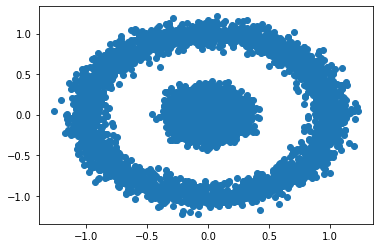

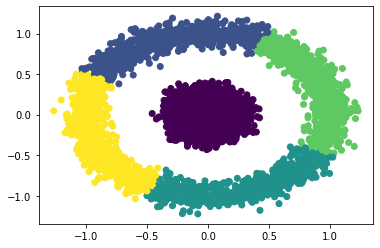

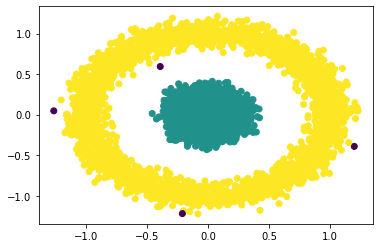

In [129]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


x, y = datasets.make_circles(n_samples=6000, factor=0.2, noise=0.08)
plt.scatter(x[:, 0], x[:, 1], marker = 'o')
plt.show()

y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()

y_pred = DBSCAN(eps=0.12, min_samples=20).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()